In [1]:
import os

In [3]:
assemblies = [f'/mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/plots/assemblies/hifiasm/par_assemblies/{file}' for file in os.listdir('/mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/plots/assemblies/hifiasm/par_assemblies')]

In [4]:
assemblies[0]

'/mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/plots/assemblies/hifiasm/par_assemblies/gp024.bp.hap2.p_ctg.fa'

In [5]:
len(assemblies)

86

In [3]:
samples = set([sample.split('.')[0] for sample in fastqs])

In [4]:
len(meryl_output)

43

In [9]:
for file in assemblies:
    sample = file.split('/')[-1].split('.')[0]
    hap = file.split('/')[-1].split('.')[2][-1]

    command = f'''#!/bin/bash
#SBATCH -p LocalQ
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
#SBATCH --cpus-per-task=40
#SBATCH --output=out/{sample}.std.out
#SBATCH --error=out/{sample}.std.err
#SBATCH --job-name={sample}.misjoin


/mnt/h700/omixlab/packages/minigraph/minigraph -cxasm /mnt/h700/omixlab/workflows/genome-project/resources/chm13v2.0.fa {file} > /mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/misjoins_cluster/misjoins_output/{sample}.{hap}.misjoins.paf

'''
    with open(f'sbatch_scripts/{sample}.{hap}.misjoin.sh', 'w+') as f:
        f.write(command)

In [ ]:
| /data/software/miniconda3/bin/samtools view -hb | /data/software/miniconda3/bin/samtools sort -@8 > /mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/winnowmap_cluster/output/{sample}.winnowmap.bam

In [2]:
from pycirclize import Circos
import pandas as pd



In [104]:
misjoins = pd.read_csv('/mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/misjoins_cluster/misjoins_output/all_misjoins.bed', sep = '\t', header=None)

In [103]:
misjoins.loc[misjoins[1] == 'gp040#2#h2tg000055l']

,0,1,2,3,4,5,6,7,8,9,10,11,12
496,J,gp040#2#h2tg000055l,6894771,2340808,3474473,+,chr21,45090682,1952903,3108042,1046426,1228219,60
497,J,gp040#2#h2tg000055l,6894771,3529006,5279237,+,chr13,113566686,9347606,11039166,1667553,1771358,60
498,J,gp040#2#h2tg000055l,6894771,3529006,5279237,+,chr13,113566686,9347606,11039166,1667553,1771358,60
499,J,gp040#2#h2tg000055l,6894771,5525932,6893630,+,chr21,45090682,8048117,9404485,1347844,1372060,1


In [120]:
columns = ['Misjoin', 'contig', 'contig_length', 'contig_start', 'contig_end', 'strand', 'ref_chromosome', 'chromosome_length', 'ref_start', 'ref_end', '', '', 'mapping_quality']

In [121]:
misjoins.rename(columns={i:name for i, name in enumerate(columns)}).to_csv('misjoins.csv')

In [56]:
pip install python-circos

Note: you may need to restart the kernel to use updated packages.


In [76]:
paf.loc[(paf[0] == 'gp001#1#h1tg000022l')  ]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
587,gp001#1#h1tg000022l,46395750,1915547,34673446,-,chr8,146259331,11506852,44318032,32668998,32865705,60,tp:A:P,NM:i:196707,cm:i:4712832,s1:i:29762106,s2:i:617689,dv:f:0.0060,cg:Z:20=1X12=1X14=1X7=1X3=1X10=1X18=1X24=2X5=1...
588,gp001#1#h1tg000022l,46395750,38628147,46200636,-,chr8,146259331,2068,7548851,7440599,7660543,60,tp:A:P,NM:i:219944,cm:i:1088077,s1:i:6785252,s2:i:411163,dv:f:0.0080,cg:Z:138=6I89=6D5=1X53=6D62=6D33=20D46=1X513=1...
589,gp001#1#h1tg000022l,46395750,34076998,39145794,+,chr8,146259331,7023195,12161730,4960884,5228344,60,tp:A:P,NM:i:267460,cm:i:695723,s1:i:4274197,s2:i:48063,dv:f:0.0094,cg:Z:20=1X2=1X27=1X6=1X3=1X29=1X3=1X9=1X16=1X1...
590,gp001#1#h1tg000022l,46395750,46205571,46385973,+,chr5,182045439,181897283,182042714,142657,182487,7,tp:A:P,NM:i:39830,cm:i:19265,s1:i:94417,s2:i:88064,dv:f:0.0135,cg:Z:494=1X51=1X18=1X553=1X45=1X961=2I645=1X64...
591,gp001#1#h1tg000022l,46395750,1890055,1937223,-,chr8,146259331,44249302,44296414,45869,47684,1,tp:A:P,NM:i:1815,cm:i:806,s1:i:6376,s2:i:6314,dv:f:0.0497,cg:Z:27=1X9=1X44=1X194=1X86=1X77=1X3=1X68=1X20...
592,gp001#1#h1tg000022l,46395750,46200993,46204310,-,chr20,66210255,67174,70492,3261,3322,1,tp:A:P,NM:i:61,cm:i:398,s1:i:3541,s2:i:3365,dv:f:0.0231,cg:Z:48=1X2=1X85=1X8=1X140=1X5=1X87=1X57=1X53=...
593,gp001#1#h1tg000022l,46395750,373302,434239,-,chr8,146259331,45616896,45677833,60884,60937,60,tp:A:P,NM:i:53,cm:i:422,s1:i:2328,s2:i:0,dv:f:0.0106,cg:Z:138=1X256=1X569=1X646=1X3058=1X749=1X638=...
594,gp001#1#h1tg000022l,46395750,482361,543298,-,chr8,146259331,45616896,45677833,60883,60937,60,tp:A:P,NM:i:54,cm:i:422,s1:i:2328,s2:i:0,dv:f:0.0104,cg:Z:138=1X256=1X569=1X646=1X3058=1X749=1X638=...
595,gp001#1#h1tg000022l,46395750,1878869,1882602,-,chr8,146259331,44317345,44321078,3719,3733,60,tp:A:P,NM:i:14,cm:i:121,s1:i:1419,s2:i:0,dv:f:0.0084,cg:Z:141=1X147=1X7=1X62=1X96=1X433=1X458=1X2=1...


In [56]:
paf = pd.read_csv('/mnt/h700/omixlab/workflows/genome-project/assembly/scripts/qc/misjoins_cluster/misjoins_output/gp001.1.misjoins.paf', sep = '\t', header=None)

In [108]:
misjoin_links = []

# Populate the matrix

for contig in misjoins[1].unique():
    contig_misjoins = misjoins.loc[misjoins[1] == contig]
    
    
    for i, row in contig_misjoins.iterrows():

        if i % 2==0:
            initial_misjoin_chr = row[6]
            initial_misjoin_start = row[3]
            initial_misjoin_end = row[4]
            
        if i % 2 == 1:
            other_misjoin_chr = row[6]
            other_misjoin_start = row[3]
            other_misjoin_end = row[4]
            misjoin_links.append(((initial_misjoin_chr, initial_misjoin_start, initial_misjoin_end, 950), (other_misjoin_chr,other_misjoin_start,other_misjoin_end, 950)))
            

        
        
        
    
        
        



In [ ]:
misjoins.to_csv('misjoins.csv')

In [114]:
temp_df = misjoins

In [115]:
temp_df['length'] = temp_df[4] - temp_df[3]

In [119]:
temp_df.sort_values('length', ascending=False).iloc[:43]

,0,1,2,3,4,5,6,7,8,9,10,11,12,length
354,J,gp026#2#h2tg000029l,39843133,7271,33849951,-,chr21,45090682,11304022,45086324,33694532,33893624,60,33842680
368,J,gp027#2#h2tg000033l,39947135,8300,33842820,-,chr21,45090682,11304022,45084727,33684957,33894704,60,33834520
250,J,gp019#1#h1tg000031l,39687437,9518,33835384,-,chr21,45090682,11304022,45086149,33697743,33876383,60,33825866
396,J,gp031#2#h2tg000045l,40123875,5759,33826868,-,chr21,45090682,11304022,45086149,33689342,33878418,60,33821109
85,J,gp006#2#h2tg000037l,43410229,9581980,43401777,+,chr21,45090682,11304022,45086283,33699213,33868683,60,33819797
219,J,gp016#1#h1tg000025l,40186971,6369197,40182226,+,chr21,45090682,11304022,45086283,33688151,33874033,60,33813029
281,J,gp020#2#h2tg000045l,43644696,9826328,43636963,+,chr21,45090682,11343451,45085322,33642974,33870602,60,33810635
108,J,gp009#1#h1tg000021l,39614164,6113,33813389,-,chr21,45090682,11304022,45085322,33687144,33865474,60,33807276
224,J,gp016#2#h2tg000026l,39822984,5,33805548,-,chr21,45090682,11304022,45054564,33655504,33866590,60,33805543
134,J,gp011#2#h2tg000033l,44374732,5972,33810376,-,chr21,45090682,11304022,45086149,33698800,33853057,60,33804404


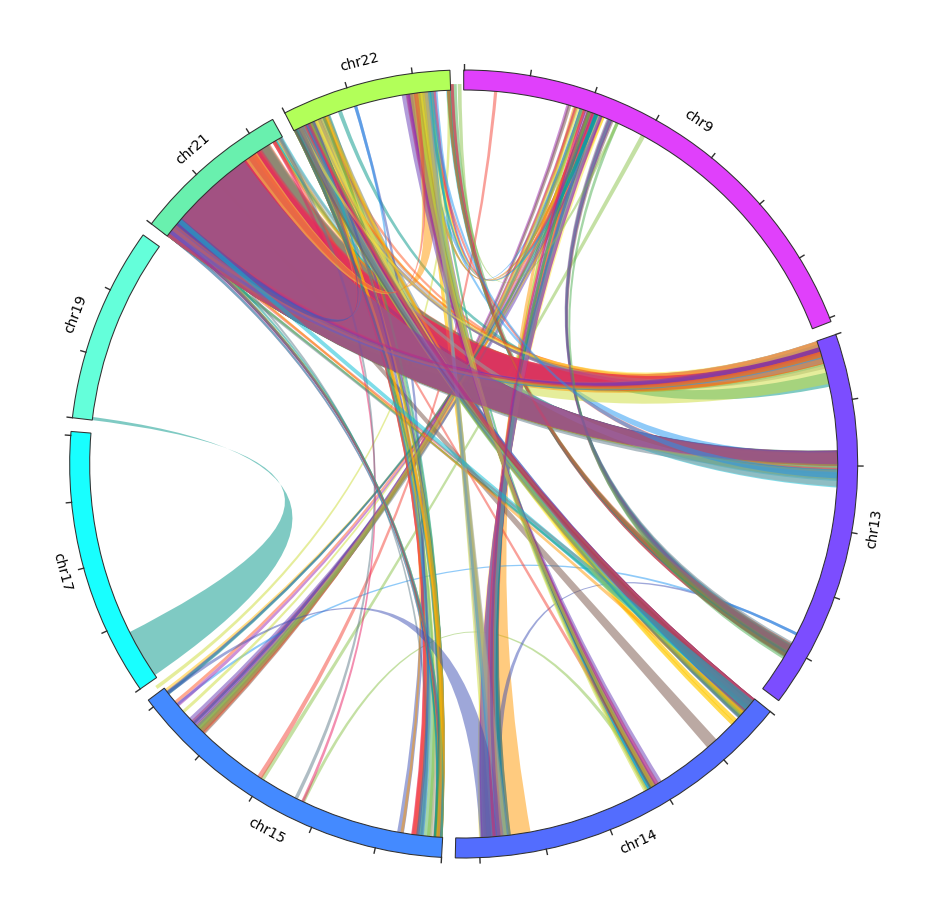

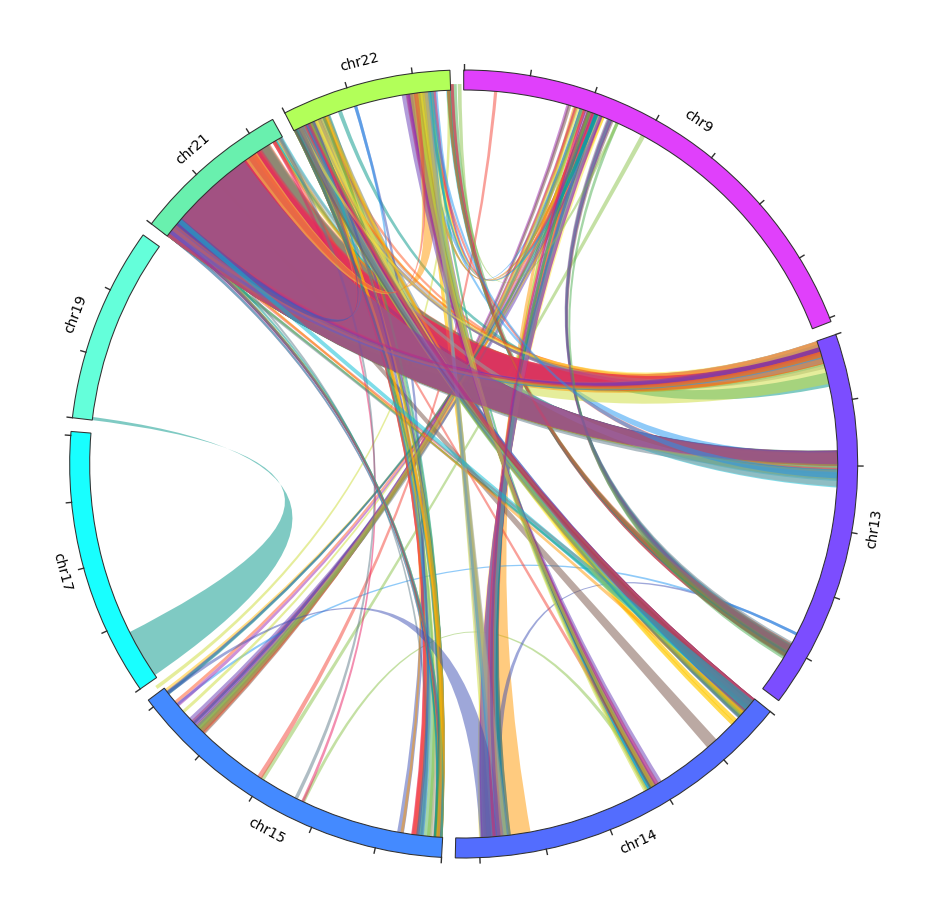

In [109]:
import pycircos
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle
circle = Gcircle(figsize=(8,8)) 
with open("example_data_chromosome_general.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
        circle.add_garc(arc) 
circle.set_garcs(0,360) 
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None) 
for link in misjoin_links:
    circle.chord_plot(link[0], link[1])
circle.figure


In [ ]:
with open(cytoband_file, 'r') as f, open('cytoband_file', 'w') as out:
    lines = f.read().splitlines()
    for line in lines:
        print(line)
        # if line.split('\t')[0] in list(misjoins[6].unique()):
        #     out.write(line + '\n')

In [32]:
chr_bed_file_1 = 'chr_bed_file.bed'

In [53]:
cytoband_file_1 = 'cytoband_file.tsv'

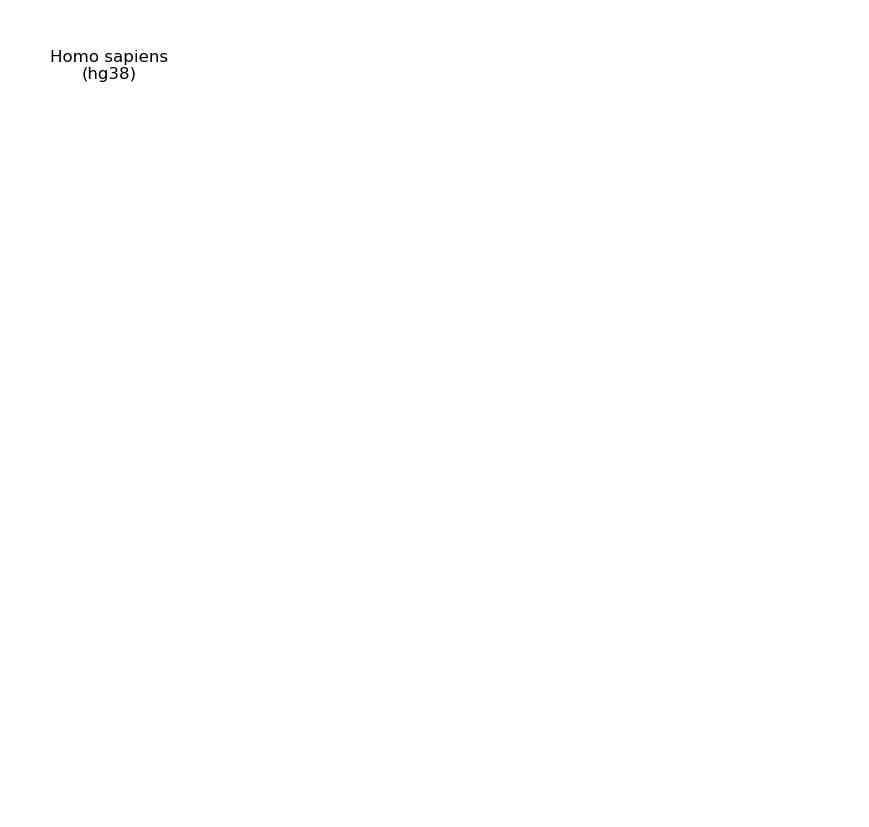

In [54]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file, cytoband_file, chr_links = load_eukaryote_example_dataset("hg38")

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file_1, space=3)
circos.text("Homo sapiens\n(hg38)", deg=315, r=150, size=12)

circos.add_cytoband_tracks((95, 100), cytoband_file_1)
ColorCycler.set_cmap("hsv") 

chr_names = [s.name for s in circos.sectors if s.name in list(misjoins[6].unique())]
# colors = ColorCycler.get_color_list(len(chr_names))
# chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# for sector in circos.sectors:
#     sector.text(sector.name, r=120, size=10, color=chr_name2color[sector.name])
#     sector.get_track("cytoband").xticks_by_interval(
#         40000000,
#         label_size=8,
#         label_orientation="vertical",
#         label_formatter=lambda v: f"{v / 1000000:.0f} Mb",
#     )
    
# for link in misjoin_links:
#     region1 = link[0]
#     region2 = link[1]
    
#     circos.link(region1, region2)

fig = circos.plotfig()

In [48]:
for link in chr_links:
    print(link)

ChrLink(query_chr='chr1', query_start=16799163, query_end=16761934, ref_chr='chr1', ref_start=234783386, ref_end=234820600)
ChrLink(query_chr='chr1', query_start=120705592, query_end=120575596, ref_chr='chr1', ref_start=120192772, ref_end=120323081)
ChrLink(query_chr='chr1', query_start=121740196, query_end=121619899, ref_chr='chr1', ref_start=122301747, ref_end=122400000)
ChrLink(query_chr='chr1', query_start=202402712, query_end=202368479, ref_chr='chrY', ref_start=26368468, ref_end=26402277)
ChrLink(query_chr='chr1', query_start=176773, query_end=103457, ref_chr='chr10', ref_start=38404659, ref_end=38483413)
ChrLink(query_chr='chr1', query_start=265770, query_end=257666, ref_chr='chr19', ref_start=58590454, ref_end=58600327)
ChrLink(query_chr='chr1', query_start=257871, query_end=265186, ref_chr='chr8', ref_start=212564, ref_end=219872)
ChrLink(query_chr='chr1', query_start=396902, query_end=382660, ref_chr='chrY', ref_start=24333317, ref_end=24347457)
ChrLink(query_chr='chr1', quer